<a href="https://colab.research.google.com/github/bmtrang-1008/-NN-MNist/blob/main/DL_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
#import data
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
print(y_train)

[5 0 4 ... 5 6 8]


In [4]:
#one_hot
x_train = x_train/255
x_test = x_test/255

#number of class 0-9 has 10 classes
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000, 10)
(10000, 10)


In [5]:
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [6]:
#Start model NN
from keras.layers import Dense, Flatten
from keras.models import Sequential

In [7]:
#Build Model NN
learning_rate = 0.01
num_epoch = 10
batch_size = 128

#Khởi tạo model
model = Sequential()

#Lớp Flatten có chức năng "trải thẳng" ảnh input đầu vào. 
model.add(Flatten(input_shape=(28,28)))

#Sử dụng hai lớp hindden layer với activation relu
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))

#Lớp output với softmax để classification
model.add(Dense(num_classes,activation='softmax'))

#Sử dụng method summary đểđể giúp chúng ta tổng hợp lại model xem model có bao nhiêu layer, tổng số tham số bao nhiêu,shape của mỗi layer
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [8]:
#Sau khi build model xong thì compile nó có tác dụng biên tập lại toàn bộ model của chúng ta đã build
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr = learning_rate),
              metrics=['accuracy'])

#Fit data (đưa data) vào model cùng thông số batch_size, epochs
model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epoch)

Epoch 1/10
469/469 [==============================] - 4s 2ms/step - loss: 1.6965 - accuracy: 0.5513
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.5208 - accuracy: 0.8703
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3901 - accuracy: 0.8943
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3368 - accuracy: 0.9051
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3004 - accuracy: 0.9161
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2856 - accuracy: 0.9198
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2702 - accuracy: 0.9250
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2575 - accuracy: 0.9273
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2435 - accuracy: 0.9313
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2288 - accuracy: 0.9351

In [9]:
#Đánh giá model
score = model.evaluate(x_test,y_test)
print('Test loss: %.4f' % (score[0]))
print('Test accuracy: %.2f%%' %(score[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.2217 - accuracy: 0.9359
Test loss: 0.2217
Test accuracy: 93.59%


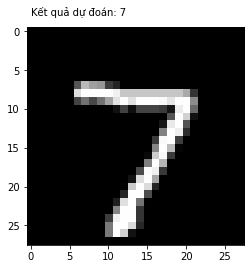

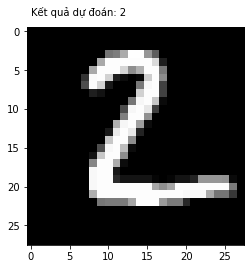

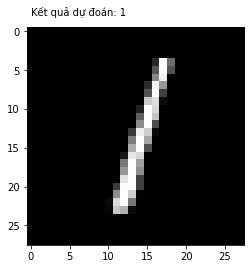

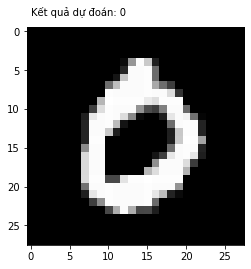

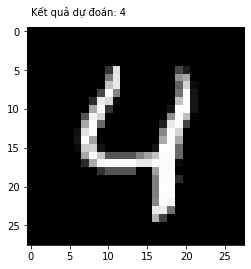

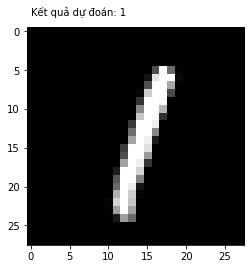

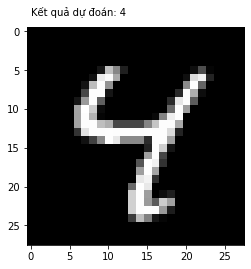

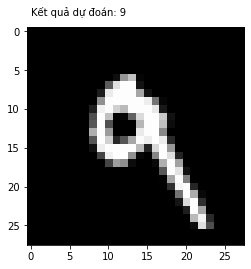

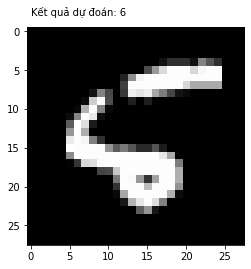

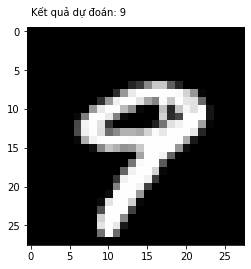

In [10]:
#Predict kết quả
import matplotlib.pyplot as plt
import numpy as np

classes = model.predict(x_test, batch_size=128)
preds = np.argmax(classes, axis=1)

for i in range(10):
  plt.imshow(x_test[i], cmap='gray')
  predict = "Kết quả dự đoán: " + str(preds[i])
  plt.text(0,-2,predict)
  plt.show()